In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🚦**Prédiction du traffic routier**

Le jeu de données de **trafic routier** contient des informations détaillées sur le volume de trafic horaire autour de Paris. Il couvre la période du **1er janvier 2023 au 31 décembre 2023**, avec des enregistrements effectués toutes les heures, pour un total de **8 736 observations**.

Ces données sont précieuses pour analyser les tendances du trafic, identifier des schémas saisonniers et évaluer l'impact des conditions météorologiques ou d’événements spécifiques.

---

## 📋 **Format des Données**

Le fichier est au format **CSV**, avec des valeurs séparées par des virgules.  
Les **valeurs manquantes** sont rares mais doivent être prises en compte lors de l'analyse.

---

## 🗂️ **Variables du Jeu de Données**

La base de données est composée de **4 variables principales** :

- **`Timestamp`** :  
  - *Type* : Date et Heure (format `YYYY-MM-DD HH:MM:SS`)  
  - *Description* : L'horodatage de chaque observation, indiquant la date et l'heure exactes de la mesure du trafic.

- **`Weather`** :  
  - *Type* : Catégoriel (Clear, Cloudy, Rain, Snow, etc.)  
  - *Description* : La condition météorologique au moment de la mesure, pouvant influencer le volume de trafic.

- **`Events`** :  
  - *Type* : Booléen (`True` / `False`)  
  - *Description* : Indique la présence (`True`) ou l'absence (`False`) d’un événement particulier (manifestations, travaux, etc.) susceptible d’affecter le trafic.

- **`Traffic Volume`** :  
  - *Type* : Numérique (float)  
  - *Unité* : Nombre de véhicules par heure  
  - *Description* : Le volume de trafic observé à l'heure spécifiée.

---

## ⚠️ **Traitement Préliminaire des Données**

Avant l’analyse :
- **Conversion des dates** : Transformation de la colonne `Timestamp` en format datetime pour faciliter l'analyse temporelle.
- **Vérification des valeurs manquantes** : Imputation ou suppression des données manquantes selon le contexte.
- **Encodage des variables catégorielles** : Transformation des colonnes `Weather` et `Events` pour les modèles de machine learning.

---

## 🎯 **Objectifs de l'Analyse**

1. **Identifier des tendances et des schémas saisonniers** du volume de trafic.
2. **Analyser l'impact des conditions météorologiques et des événements** sur la circulation.
3. **Prévoir le volume de trafic futur** à l'aide de modèles de séries temporelles et de techniques de machine learning.

---

Ce dataset offre une base solide pour explorer la dynamique du trafic urbain et développer des modèles prédictifs robustes. 🚀


In [2]:
# Load the data
df = pd.read_csv('data/traffic_dataset_with_trend.csv')
print(df.shape)
print(df["Timestamp"].min(), df["Timestamp"].max())
df.head()

(8736, 4)
2023-01-01 00:00:00 2023-12-30 23:00:00


,Timestamp,Weather,Events,Traffic Volume
0,2023-01-01 00:00:00,Cloudy,False,803.0
1,2023-01-01 01:00:00,Clear,False,861.0
2,2023-01-01 02:00:00,Clear,False,582.0
3,2023-01-01 03:00:00,Cloudy,False,236.0
4,2023-01-01 04:00:00,Cloudy,False,569.0


In [3]:
df.describe()

,Traffic Volume
count,8736.000000
mean,1281.395833
std,727.291462
min,118.000000
25%,893.000000
50%,1123.000000
75%,1415.000000
max,6465.000000


In [4]:
missing_proportion = df.isnull().mean() * 100
print(missing_proportion)

Timestamp         0.0
Weather           0.0
Events            0.0
Traffic Volume    0.0
dtype: float64


In [5]:
df["Weather"].value_counts(normalize=True)

Weather
Clear     0.591117
Cloudy    0.309409
Rain      0.089057
Snow      0.010417
Name: proportion, dtype: float64

In [6]:
df["Events"].value_counts(normalize=True)

Events
False    0.899267
True     0.100733
Name: proportion, dtype: float64

### 🚦 Analyse du Volume de Trafic au Fil du Temps

- Le graphique montre des **pics réguliers** et des **baisses soudaines**, caractéristiques d'un trafic routier influencé par des schémas récurrents.
- On remarque des **fluctuations importantes** du volume de trafic sur l'ensemble de l'année, indiquant une forte variabilité.


Text(0.5, 1.0, 'Traffic Volume Over Time')

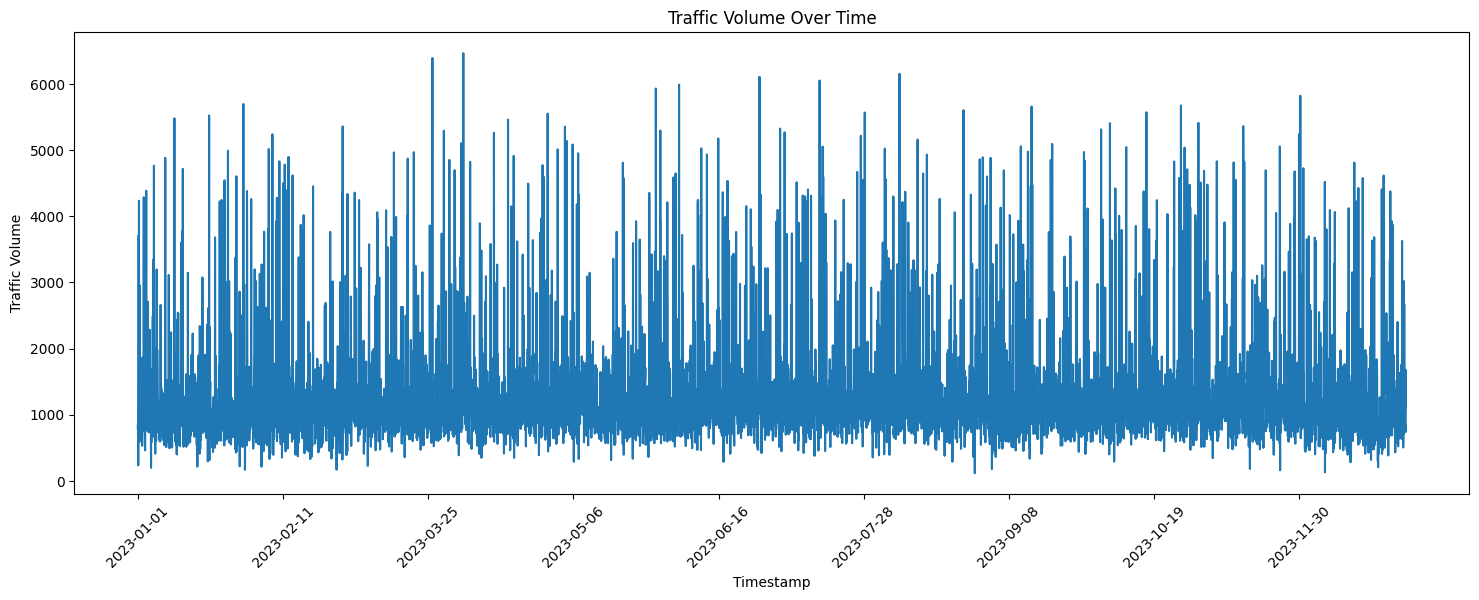

In [7]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Line plot
plt.figure(figsize=(18, 6))
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df)
plt.xticks(ticks=df['Timestamp'][::1000], rotation=45)

plt.title('Traffic Volume Over Time')

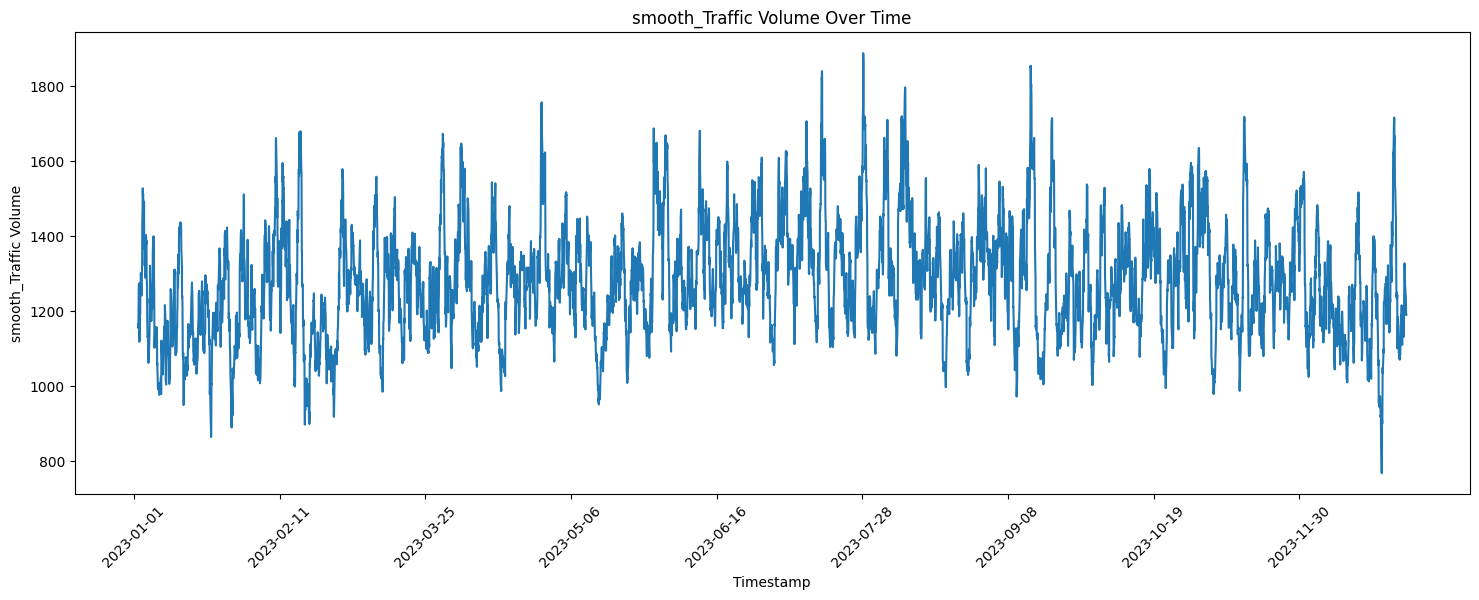

In [8]:
# smoothe data
plt.figure(figsize=(18, 6))
# Smooth the data using rolling mean
df['smooth_Traffic Volume'] = df['Traffic Volume'].rolling(window=30).mean()
sns.lineplot(x='Timestamp', y='smooth_Traffic Volume', data=df,errorbar=None)
plt.xticks(ticks=df['Timestamp'][::1000], rotation=45)

plt.title('smooth_Traffic Volume Over Time')
plt.show()

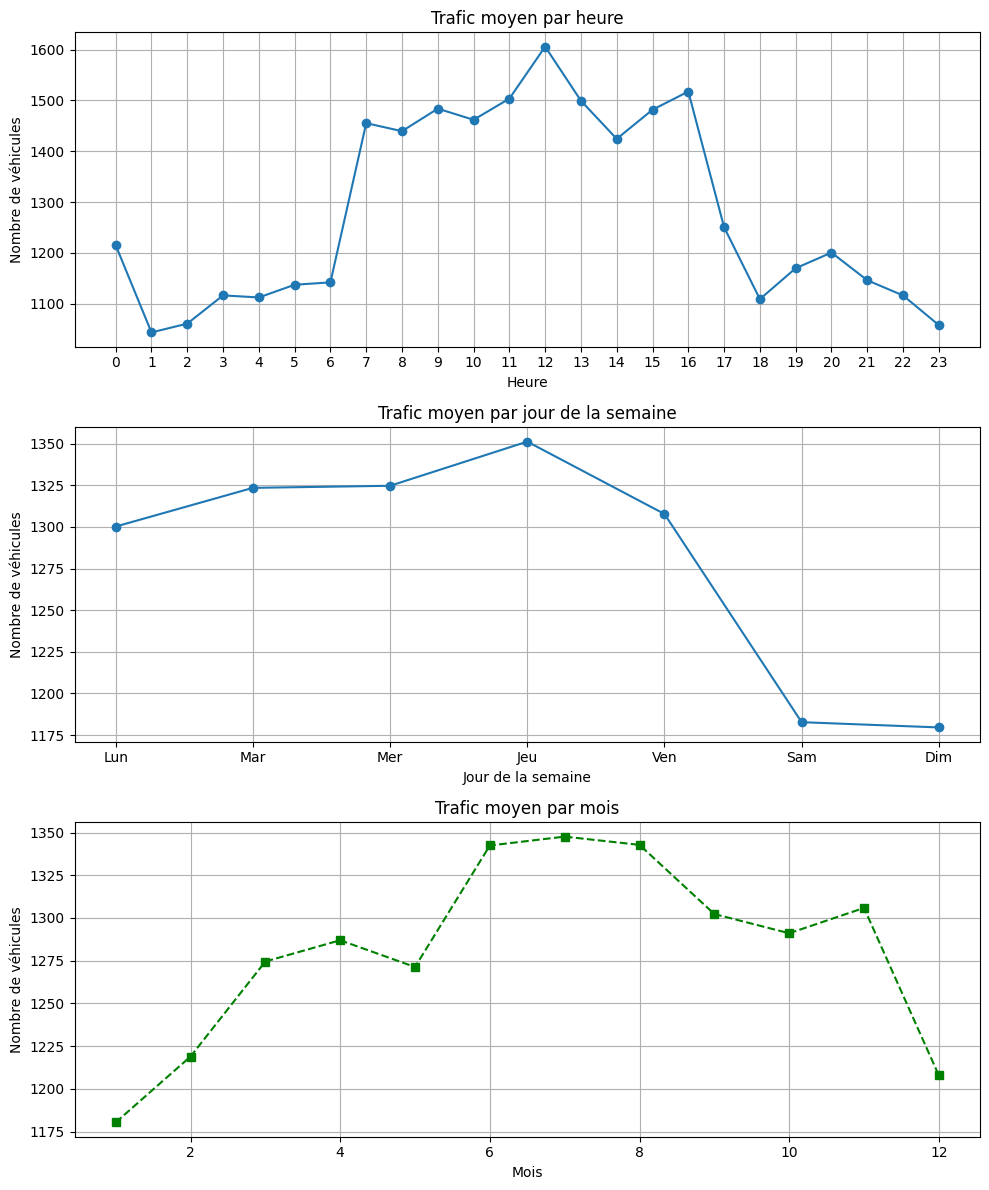

In [9]:
df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.dayofweek 
df["Month"] = df["Timestamp"].dt.month

# Moyenne du trafic par heure
hourly_traffic = df.groupby("Hour")["Traffic Volume"].mean()

# Moyenne du trafic par jour µde la semaine
daily_traffic = df.groupby("Day")["Traffic Volume"].mean()

# Moyenne du trafic par mois
monthly_traffic = df.groupby("Month")["Traffic Volume"].mean()

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Trafic moyen par heure
axes[0].plot(hourly_traffic.index, hourly_traffic.values, marker='o')
axes[0].set_title("Trafic moyen par heure")
axes[0].set_xlabel("Heure")
axes[0].set_ylabel("Nombre de véhicules")
axes[0].grid(True)
axes[0].set_xticks(hourly_traffic.index)


# Trafic moyen par jour de la semaine
axes[1].plot(daily_traffic.index, daily_traffic.values, marker='o', linestyle='-')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(["Lun", "Mar", "Mer", "Jeu", "Ven", "Sam", "Dim"])
axes[1].set_title("Trafic moyen par jour de la semaine")
axes[1].set_xlabel("Jour de la semaine")
axes[1].set_ylabel("Nombre de véhicules")
axes[1].grid(True)

# Trafic moyen par mois
axes[2].plot(monthly_traffic.index, monthly_traffic.values, marker='s', linestyle='--', color='g')
axes[2].set_title("Trafic moyen par mois")
axes[2].set_xlabel("Mois")
axes[2].set_ylabel("Nombre de véhicules")
axes[2].grid(True)

plt.tight_layout()
plt.show()

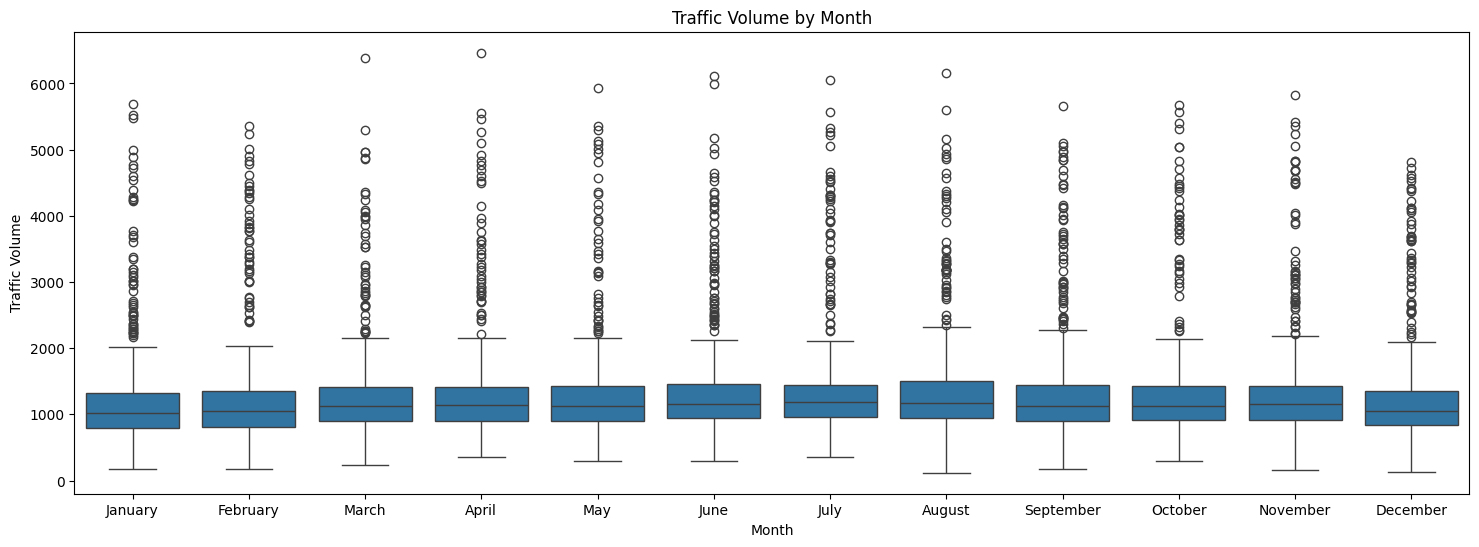

In [10]:
# box plot per month
df['Month'] = df['Timestamp'].dt.month_name()
plt.figure(figsize=(18, 6))
sns.boxplot(x='Month', y='Traffic Volume', data=df)
plt.title('Traffic Volume by Month')
plt.show()

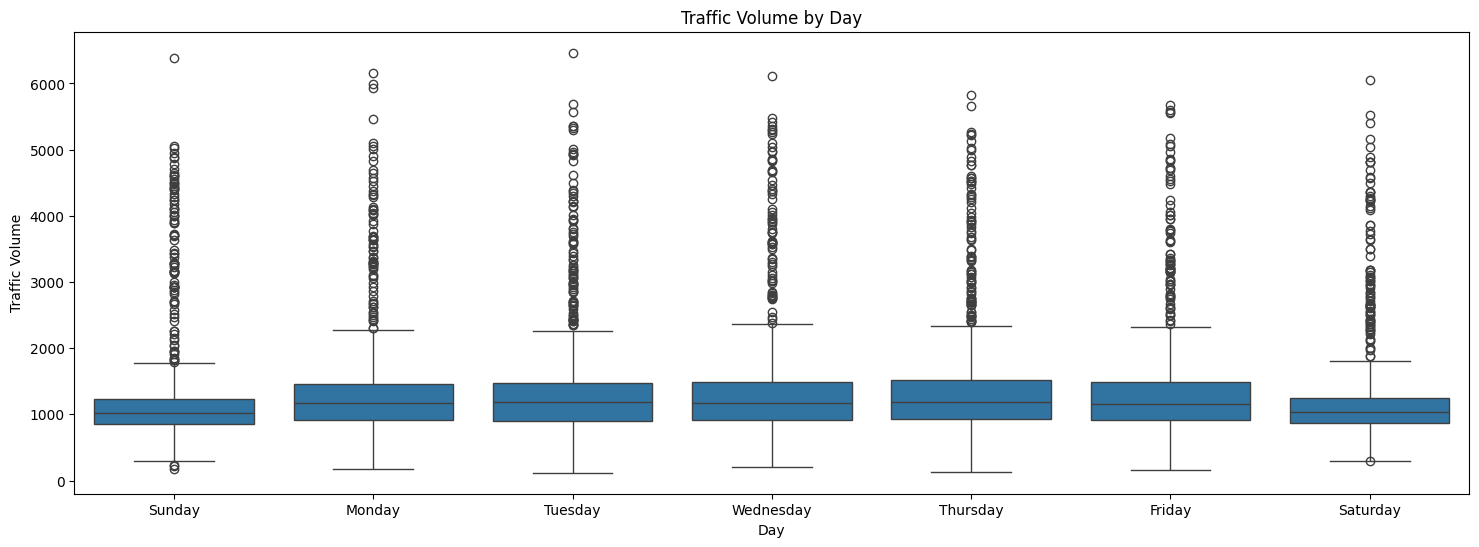

In [11]:
# box plot per day
df['Day'] = df['Timestamp'].dt.day_name()
plt.figure(figsize=(18, 6))
sns.boxplot(x='Day', y='Traffic Volume', data=df)
plt.title('Traffic Volume by Day')
plt.show()

C:\Users\emmae\AppData\Local\Temp\ipykernel_82268\519031725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather', y='Traffic Volume', data=df, palette='Set2')


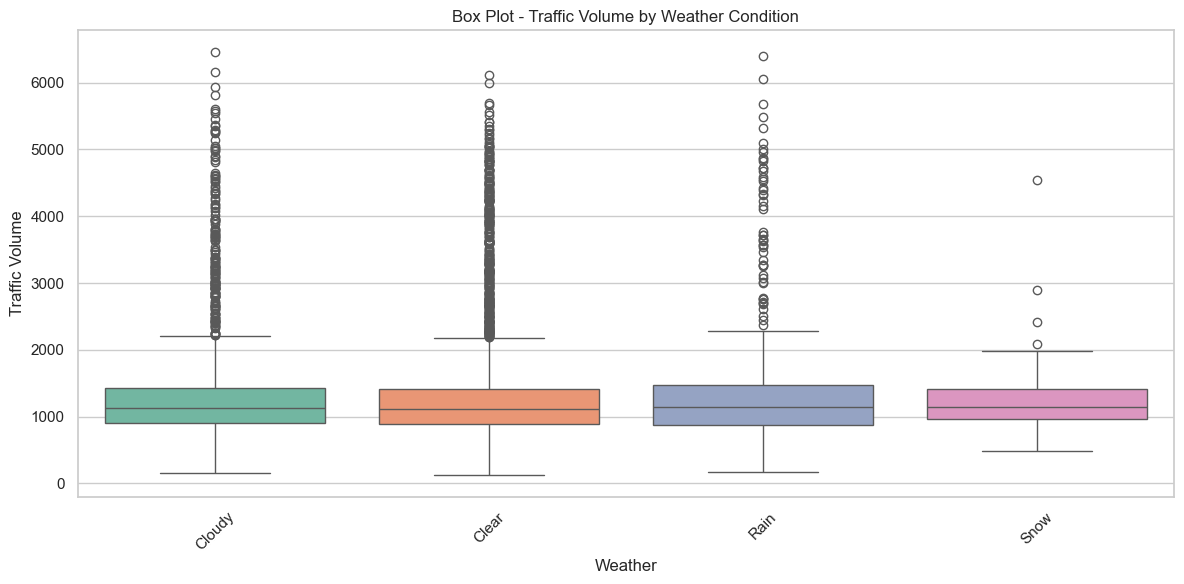

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='Traffic Volume', data=df, palette='Set2')
plt.title('Box Plot - Traffic Volume by Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

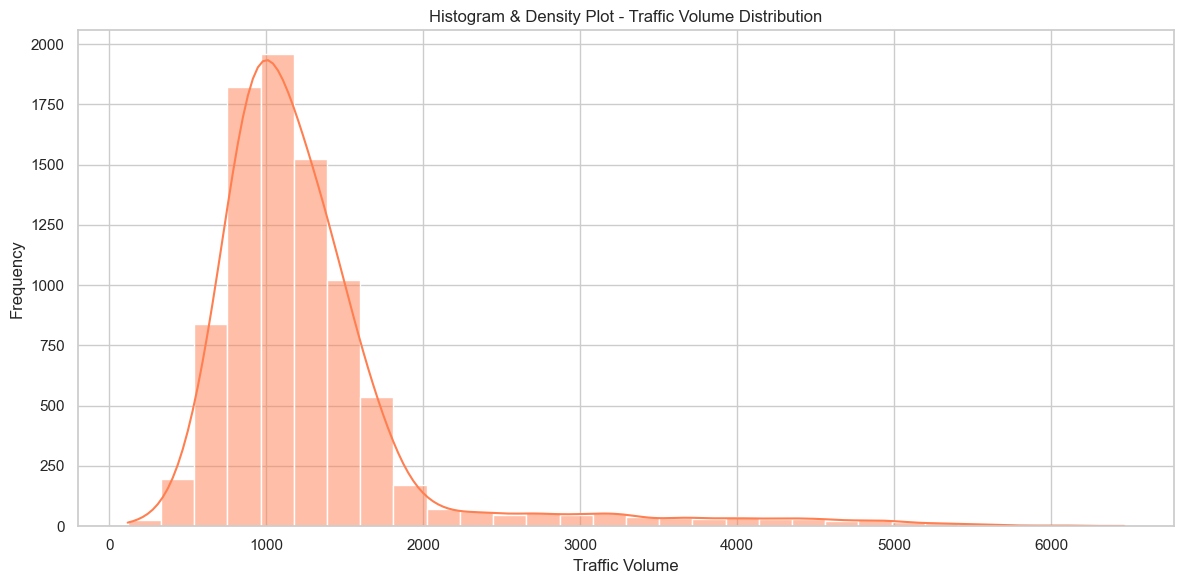

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Traffic Volume'], kde=True, color='coral', bins=30)
plt.title('Histogram & Density Plot - Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

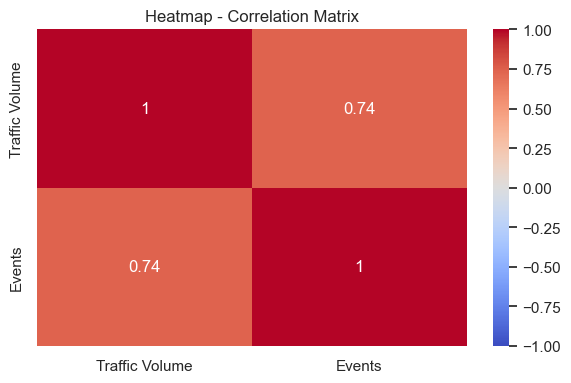

In [15]:
df['Events'] = df['Events'].astype(int)
corr = df[['Traffic Volume', 'Events']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap - Correlation Matrix')
plt.tight_layout()
plt.show()

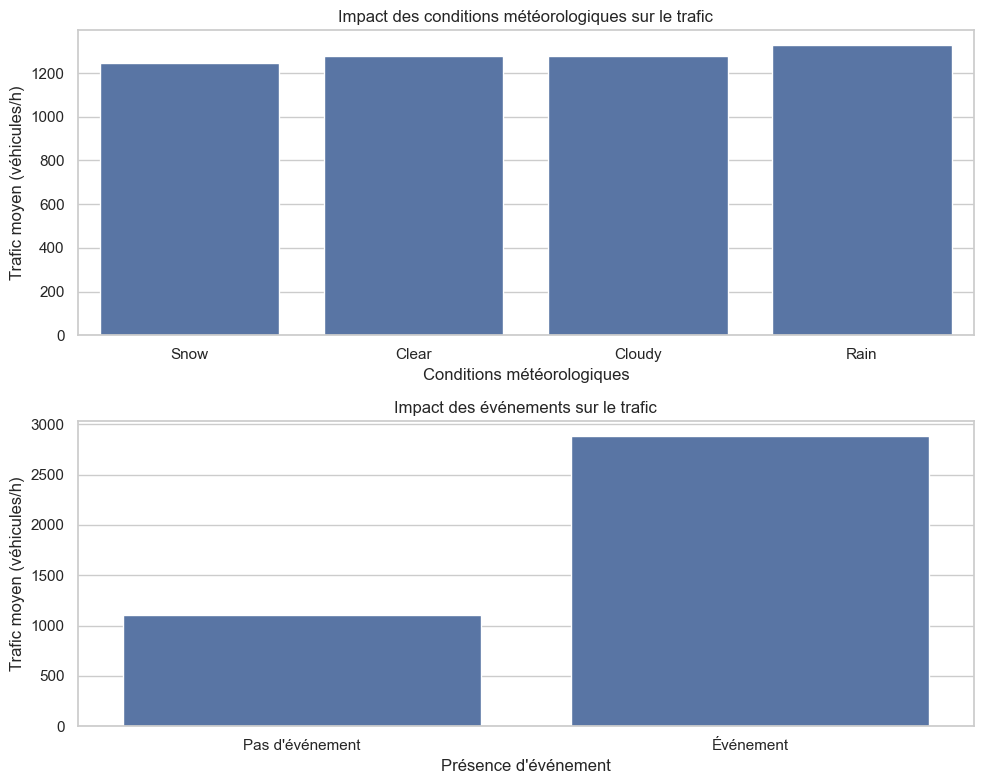

In [16]:
weather_traffic = df.groupby("Weather")["Traffic Volume"].mean().sort_values()

# Moyenne du trafic en fonction des événements
event_traffic = df.groupby("Events")["Traffic Volume"].mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.barplot(x=weather_traffic.index, y=weather_traffic.values, ax=axes[0])
axes[0].set_title("Impact des conditions météorologiques sur le trafic")
axes[0].set_xlabel("Conditions météorologiques")
axes[0].set_ylabel("Trafic moyen (véhicules/h)")

sns.barplot(x=["Pas d'événement", "Événement"], y=event_traffic.values, ax=axes[1])
axes[1].set_title("Impact des événements sur le trafic")
axes[1].set_xlabel("Présence d'événement")
axes[1].set_ylabel("Trafic moyen (véhicules/h)")

plt.tight_layout()
plt.show()

NameError: name 'decomp_daily' is not defined

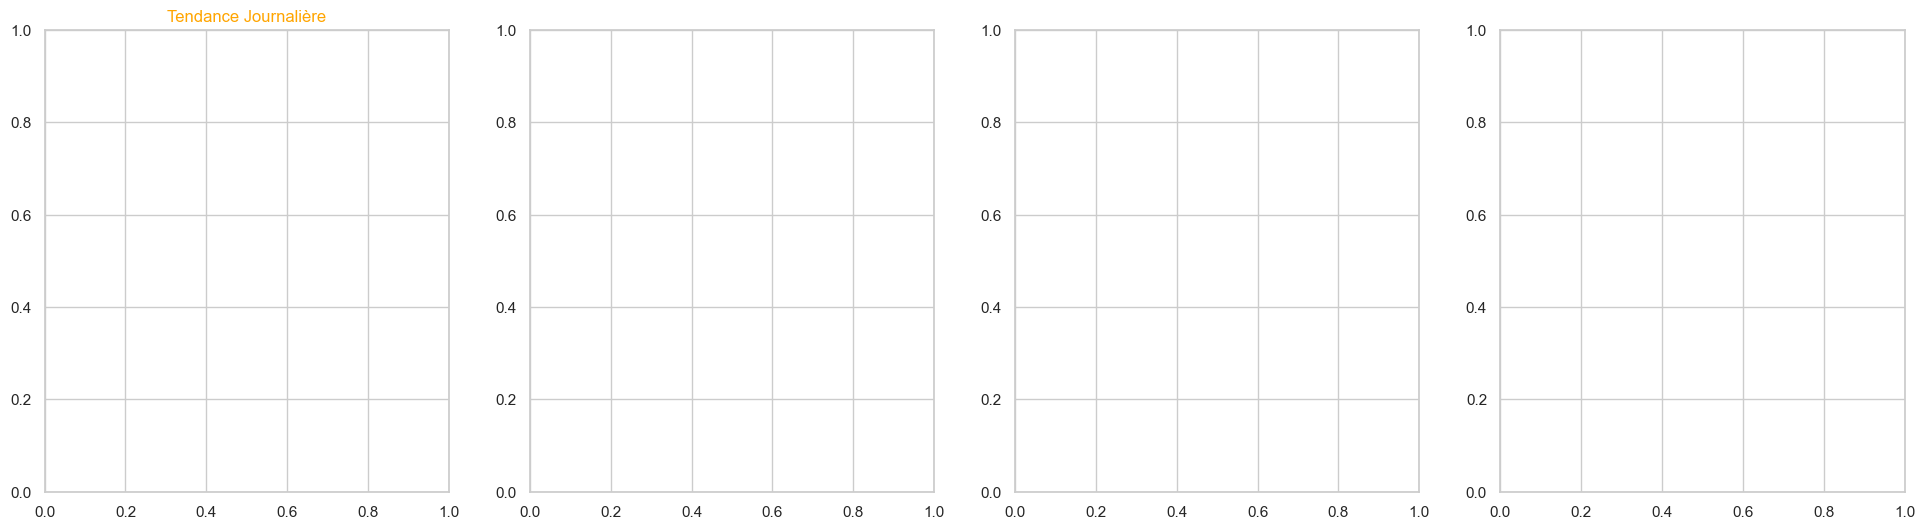

In [17]:
# 📌 Décomposition Temporelle avec Affichage Agrandi et Séparé

# Définition des couleurs pour chaque périodicité
colors = {
    "daily": "orange",
    "weekly": "blue",
    "monthly": "red",
    "biannual": "green"
}

# 🔹 Affichage séparé pour chaque métrique (Tendance, Saison, Résidus)

# 🎯 Tendance
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

axes[0].set_title("Tendance Journalière", color=colors["daily"])
decomp_daily.trend.plot(ax=axes[0], color=colors["daily"])

axes[1].set_title("Tendance Hebdomadaire", color=colors["weekly"])
decomp_weekly.trend.plot(ax=axes[1], color=colors["weekly"])

axes[2].set_title("Tendance Mensuelle", color=colors["monthly"])
decomp_monthly.trend.plot(ax=axes[2], color=colors["monthly"])

axes[3].set_title("Tendance Bi-annuelle (6 mois)", color=colors["biannual"])
decomp_biannual.trend.plot(ax=axes[3], color=colors["biannual"])

plt.tight_layout()
plt.show()

# 🎯 Saison
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

axes[0].set_title("Saisonnalité Journalière", color=colors["daily"])
decomp_daily.seasonal.plot(ax=axes[0], color=colors["daily"])

axes[1].set_title("Saisonnalité Hebdomadaire", color=colors["weekly"])
decomp_weekly.seasonal.plot(ax=axes[1], color=colors["weekly"])

axes[2].set_title("Saisonnalité Mensuelle", color=colors["monthly"])
decomp_monthly.seasonal.plot(ax=axes[2], color=colors["monthly"])

axes[3].set_title("Saisonnalité Bi-annuelle (6 mois)", color=colors["biannual"])
decomp_biannual.seasonal.plot(ax=axes[3], color=colors["biannual"])

plt.tight_layout()
plt.show()

# 🎯 Résidus
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

axes[0].set_title("Résidus Journaliers", color=colors["daily"])
decomp_daily.resid.plot(ax=axes[0], color=colors["daily"])

axes[1].set_title("Résidus Hebdomadaires", color=colors["weekly"])
decomp_weekly.resid.plot(ax=axes[1], color=colors["weekly"])

axes[2].set_title("Résidus Mensuels", color=colors["monthly"])
decomp_monthly.resid.plot(ax=axes[2], color=colors["monthly"])

axes[3].set_title("Résidus Bi-annuels (6 mois)", color=colors["biannual"])
decomp_biannual.resid.plot(ax=axes[3], color=colors["biannual"])

plt.tight_layout()
plt.show()


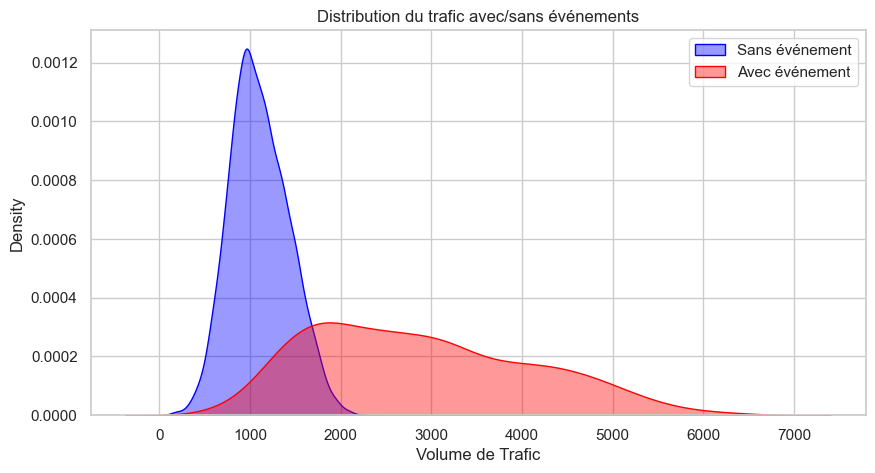

In [138]:
# 📌 **Exploration de l'Impact des Événements sur les Pics de Trafic**

df_event = df_decomp[df_decomp["Events"] == True]
df_no_event = df_decomp[df_decomp["Events"] == False]

# Comparaison des distributions de trafic
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df_no_event["Traffic Volume"], label="Sans événement", color="blue", fill=True, alpha=0.4)
sns.kdeplot(df_event["Traffic Volume"], label="Avec événement", color="red", fill=True, alpha=0.4)
ax.set_title("Distribution du trafic avec/sans événements")
ax.set_xlabel("Volume de Trafic")
ax.legend()
plt.show()


In [139]:

# 📌 **Comparaison des Jours Fériés vs Jours Ouvrés**
holidays = [
    "2023-01-01", "2023-04-10", "2023-05-01", "2023-05-08", "2023-07-14",
    "2023-08-15", "2023-11-01", "2023-11-11", "2023-12-25"
]
holidays = pd.to_datetime(holidays)

df_decomp["Is_Holiday"] = df_decomp.index.date.astype("datetime64").isin(holidays)

# # Calcul de la moyenne du trafic par type de jour
# traffic_holiday = df_decomp[df_decomp["Is_Holiday"]]["Traffic Volume"].mean()
# traffic_weekday = df_decomp[~df_decomp["Is_Holiday"]]["Traffic Volume"].mean()

# # Affichage des résultats
# fig, ax = plt.subplots(figsize=(8, 5))
# ax.bar(["Jours Ouvrés", "Jours Fériés"], [traffic_weekday, traffic_holiday], color=["blue", "red"], alpha=0.6)
# ax.set_title("Comparaison du trafic : Jours Ouvrés vs Jours Fériés")
# ax.set_ylabel("Trafic Moyen")
# plt.show()


AttributeError: 'Index' object has no attribute 'date'

### 📊 Analyse des Lag Scatter Plots

#### 🔹 Corrélation positive forte (Lags 1 à 4) :
- Les points forment un **alignement presque linéaire**, indiquant une forte **autocorrélation**.
- Cela signifie que le **volume de trafic actuel est fortement influencé par les volumes des heures précédentes**.
- Le trafic suit un **comportement assez prévisible à court terme**.

---

#### 🔸 Diminution progressive de la corrélation (à partir de Lag 5) :
- La **dispersion des points augmente légèrement**, bien que la corrélation reste visible.
---

#### 🔻 Patterns récurrents (Lags > 8) :
- Même avec des **retards plus longs**, on remarque des **structures cohérentes**, ce qui pourrait indiquer des **cycles journaliers ou hebdomadaires**.
---

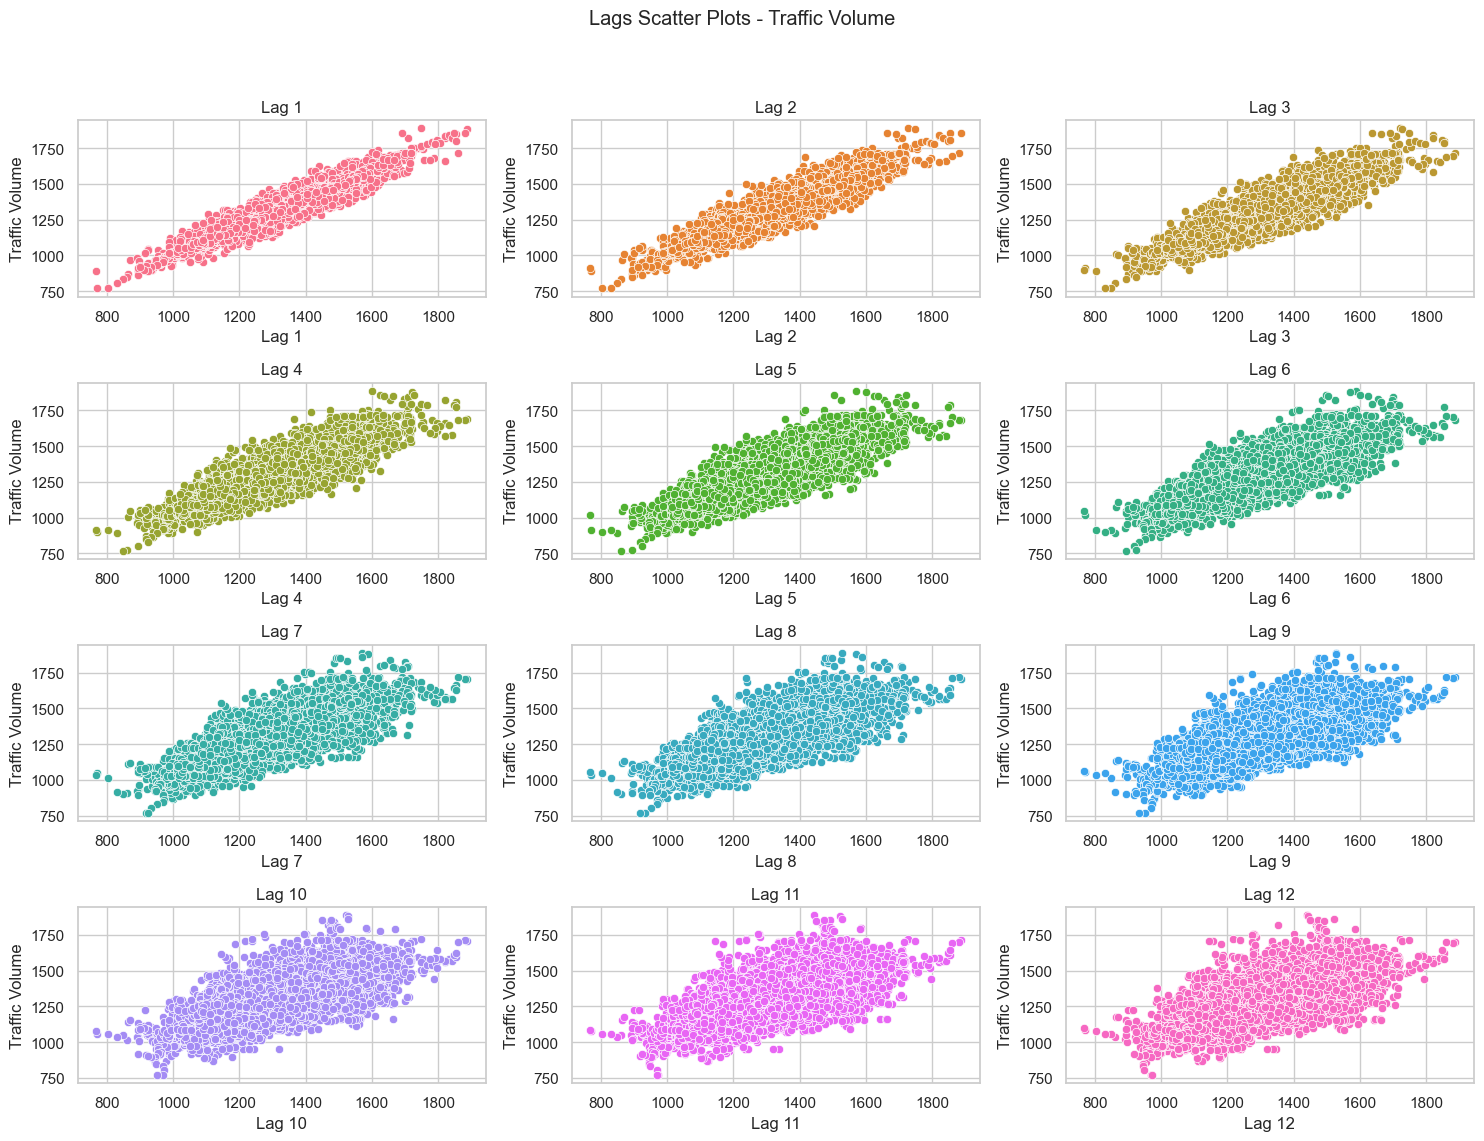

In [21]:
lags = 12
fig, axs = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Lags Scatter Plots - Traffic Volume')

for i in range(1, lags + 1):
    ax = axs[(i-1)//3, (i-1)%3]
    df[f'lag_{i}'] = df['Traffic Volume'].shift(i)
    sns.scatterplot(
        x=df[f'lag_{i}'], 
        y=df['Traffic Volume'], 
        ax=ax,
        color=sns.color_palette("husl", lags)[i-1]
    )
    ax.set_title(f'Lag {i}')
    ax.set_xlabel(f'Lag {i}')
    ax.set_ylabel('Traffic Volume')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()